# EDA for the HSSC paper

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Questions" data-toc-modified-id="Table-of-Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Questions</a></span></li><li><span><a href="#Library-imports" data-toc-modified-id="Library-imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Library imports</a></span></li><li><span><a href="#Data-imports" data-toc-modified-id="Data-imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data imports</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Data-tranformations" data-toc-modified-id="Data-tranformations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data tranformations</a></span><ul class="toc-item"><li><span><a href="#Date-from-string-to-date-format" data-toc-modified-id="Date-from-string-to-date-format-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Date from string to date-format</a></span></li><li><span><a href="#Replace-0s-by-1s-to-avoid-zero-division" data-toc-modified-id="Replace-0s-by-1s-to-avoid-zero-division-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Replace 0s by 1s to avoid zero division</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Sentence-length" data-toc-modified-id="Sentence-length-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Sentence length</a></span></li><li><span><a href="#Number-of-incentives" data-toc-modified-id="Number-of-incentives-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Number of incentives</a></span></li></ul></li></ul></div>

## Table of Questions
[Sentence length](#Sentence-length)
  * Is there any pattern in the distribution of sentence length?
  * Is there any insight that we can draw from the analysis of the distribution of sentence length in relation with the sentence splitting process?
  
[Number of incentives](#Number-of-incentives)  
  * What is the absolute number of incentives?
  * What is the ratio of documents with incentives?
  * What is the average number of incentives per document?


## Library imports

In [1]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from datetime import datetime as dt
from sklearn.metrics import r2_score


## Data imports

In [2]:
# Names of the columns in the database
col_names = ["id", "country", "pub lication_source", "issuing_institution", "doc_type", "date", "doc_title", "summary",
            "url", "num_sents", "min_sent_len", "max_sent_len", "avg_sent_len", "num_incentives_sbert", "supplies_sbert",
            "loan_sbert", "fine_sbert", "direct_payment_sbert", "technical_assistance_sbert", "tax_benefit_sbert",
            "num_incentives_bert", "supplies_bert", "loan_bert", "fine_bert", "direct_payment_bert", "technical_assistance_bert",
            "tax_benefit_bert"]

In [3]:
# Loading the two csv files and merging them toghether in a single dataframe.
in_path = "../input/"
files = [f"{in_path}spanish_metadata.csv", f"{in_path}english_metadata.csv"]

dfs = []

for filename in files:
    df_temp = pd.read_csv(filename, index_col=None, header=None)
    dfs.append(df_temp)

df = pd.concat(dfs, axis=0, ignore_index=True)
df.columns = col_names

In [ ]:
# Execute it only if yo want to save the contents of the whole database into an excel file
out_path = "../output/"
file_name =  "metadata.xlsx"
df.to_excel(f"{out_path}{file_name}")

In [4]:
# Execute it only if you want to visualize the first 5 rows of the dataframe
df.head()

,id,country,pub lication_source,issuing_institution,doc_type,date,doc_title,summary,url,num_sents,...,direct_payment_sbert,technical_assistance_sbert,tax_benefit_sbert,num_incentives_bert,supplies_bert,loan_bert,fine_bert,direct_payment_bert,technical_assistance_bert,tax_benefit_bert
0,765d4ea2383aaf45bb29bf75feadea6e06a80fd2,El Salvador,Diario Oficial,INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal),Decreto Municipal-Tamanique,27/01/2015,ORDENANZA REGULADORA DE USOS DE SUELO Y ACTUAC...,"La presente Ordenanza tiene por objeto, promov...",https://www.jurisprudencia.gob.sv/DocumentosBo...,315,...,11,0,1,52,3,1,30,12,1,5
1,06dafc0a507e270d9b23b192489cb1012aed1a8f,El Salvador,Diario Oficial,ORGANO EJECUTIVO (Ministerio de Medio Ambiente...,Decreto Ejecutivo,01/02/2018,DECRETO POR MEDIO DEL CUAL SE ESTABLECE COMO A...,El presente Decreto tiene como objetivos conse...,https://www.jurisprudencia.gob.sv/DocumentosBo...,28,...,0,0,0,1,1,0,0,0,0,0
2,3416cbf9af02b66c40c8ee6f6aa5988ba680dcb2,El Salvador,Diario Oficial,INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal),Decreto Municipal-Jocoro,21/08/2017,ORDENANZA REGULADORA DE LOS RESIDUOS SOLIDOS D...,La presente ordenanza tiene por objeto estable...,https://www.jurisprudencia.gob.sv/DocumentosBo...,228,...,1,4,1,26,4,0,20,0,1,1
3,485f9571c67f4a8009dd340bc5905f56a767b400,El Salvador,Diario Oficial,ORGANO EJECUTIVO (Ministerio de Medio Ambiente...,Decreto Ejecutivo,08/10/2014,DECRETO POR MEDIO DEL CUAL SE ESTABLECE AREA N...,El presente Decreto tiene como objetivos conse...,https://www.jurisprudencia.gob.sv/DocumentosBo...,30,...,0,0,0,0,0,0,0,0,0,0
4,2c1449a52f077b5b0d61471a55601f0a316be1a9,El Salvador,Diario Oficial,INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal),Decreto Municipal-San José Villanueva,06/09/2012,ORDENANZA DE CONTRIBUCION ESPECIAL DE INSTALAC...,El objeto de la presente Ordenanza es el de no...,https://www.jurisprudencia.gob.sv/DocumentosBo...,29,...,2,0,0,4,0,0,1,1,0,2


In [5]:
# Execute it only of you want to ave a summary of the main descriptive statistics
df.describe()

,num_sents,min_sent_len,max_sent_len,avg_sent_len,num_incentives_sbert,supplies_sbert,loan_sbert,fine_sbert,direct_payment_sbert,technical_assistance_sbert,tax_benefit_sbert,num_incentives_bert,supplies_bert,loan_bert,fine_bert,direct_payment_bert,technical_assistance_bert,tax_benefit_bert
count,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000
mean,174.408884,65.205701,1481.993705,262.339193,4.541837,0.186592,0.940605,0.496246,1.938582,0.642822,0.336990,5.263208,0.288926,1.124725,0.522189,2.384155,0.637471,0.305742
std,456.602814,1499.307493,5065.627467,772.921029,22.578820,1.437637,10.604733,2.619774,11.354919,4.489930,1.692201,28.573664,2.006435,14.309902,3.090113,14.855040,4.976735,2.037232
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,27.000000,658.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,35.000000,830.000000,209.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139.000000,46.000000,1319.000000,271.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,14656.000000,100000.000000,284859.000000,101915.000000,747.000000,70.000000,736.000000,78.000000,397.000000,252.000000,72.000000,1172.000000,73.000000,1152.000000,101.000000,594.000000,246.000000,96.000000


In [18]:
# Number of sentences
len(df)

22241

## Functions

In [12]:
# To transform dd/mm/yyyy dates in string format to yyyy/mm/dd or viceversa
def reorder_date(string):
    elements = string.split("/")
    return(f"{elements[2]}/{elements[1]}/{elements[0]}")
        
# To standardize all dates in string format and convert them to datetime format
def standardize_date(string):
    string = string.replace("-", "/").strip()
    if re.search(r"[\d]{2}/[\d]{2}/[\d]{4}", string):
        string = reorder_date(string)
    try:
        date = dt.strptime(string, '%Y/%m/%d')
        return date
    except:
        print(f"{string}")

# To calculate the confidence interval of a series of values
# The significance values can be only 0.05 or 0.01
# The two available methods are "ci_normal", "ci_not_normal" and "2xs"
def confidence_interval(significance_value, method, list_of_values):
    methods = {"ci_normal" : 0, "ci_not_normal" : 0, "2xs" : 0}
    significances = {0.05 : 0, 0.01 : 0}
    z_values = {0.05 : 1.92, 0.01 : 2.58}
    t_values_n10 = {0.05 : 2.92, 0.01 : 6.96}
    t_values_n20 = {0.05 : 2.05, 0.01 : 3.36}
    s = np.std(list_of_values)
    
    if method not in methods:
        print(f"ERROR! The method is not properly spelled or it is not available.\nPlease select one of: \"ci_normal\", \"ci_not_normal\" or \"2xs\"")
        return
    if significance_value not in significances:
        print(f"ERROR! ThThe choosen significance value is not available.\nPlease select one of: 0.05 or 0.01")
        return
    elif method == "2xs":
        return(2*s)
    else:
        if method == "ci_normal" or len(list_of_values) > 20:
            z = z_values[significance_value]
        if method == "ci_not_normal" and len(list_of_values) <= 20:
            if len(list_of_values) <= 10:
                z = t_values_n10[significance_value]
            elif len(list_of_values) <= 20:
                z = t_values_n20[significance_value]
        return(s * z / np.sqrt(len(list_of_values)))
            
            
        
    
    

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    labels = [int(x) for x in bins[1:] - 1]
    labels = [int(x) for x in bins[1:]]
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), labels, **kwargs)
#     plt.xlim(bins[0], bins[-1])

## Data tranformations

### Date from string to date-format
The format of the date is not homogeneous on the date column\
The date is of type *string* which is not good for calculations

In the next couple of cells we will:
* Add a new column with the date in format datetime
* Standardize the date column to yyyy-mm-dd


In [13]:
# Inserting a new column called "date_time" containing the date as datetime type to easy calculations
df.insert(6, "date_time", df['date'].map(standardize_date))

In [14]:
# Transforming the date values to standardize them in the format yyyy-mm-dd
df["date"] = df["date_time"].dt.strftime("%Y-%m-%d")

### Replace 0s by 1s to avoid zero division

* As there are 5 documents with 0 sentences, we replace the num_sents value by 1 to avoid zero division
* We also replace all five values of "avg_sent_len" from 0 to 1

In [15]:
df["num_sents"].replace({0 : 1}, inplace = True)
df["avg_sent_len"].replace({0 : 1}, inplace = True)

In [16]:
df

,id,country,pub lication_source,issuing_institution,doc_type,date,date_time,doc_title,summary,url,...,direct_payment_sbert,technical_assistance_sbert,tax_benefit_sbert,num_incentives_bert,supplies_bert,loan_bert,fine_bert,direct_payment_bert,technical_assistance_bert,tax_benefit_bert
0,765d4ea2383aaf45bb29bf75feadea6e06a80fd2,El Salvador,Diario Oficial,INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal),Decreto Municipal-Tamanique,2015-01-27,2015-01-27,ORDENANZA REGULADORA DE USOS DE SUELO Y ACTUAC...,"La presente Ordenanza tiene por objeto, promov...",https://www.jurisprudencia.gob.sv/DocumentosBo...,...,11,0,1,52,3,1,30,12,1,5
1,06dafc0a507e270d9b23b192489cb1012aed1a8f,El Salvador,Diario Oficial,ORGANO EJECUTIVO (Ministerio de Medio Ambiente...,Decreto Ejecutivo,2018-02-01,2018-02-01,DECRETO POR MEDIO DEL CUAL SE ESTABLECE COMO A...,El presente Decreto tiene como objetivos conse...,https://www.jurisprudencia.gob.sv/DocumentosBo...,...,0,0,0,1,1,0,0,0,0,0
2,3416cbf9af02b66c40c8ee6f6aa5988ba680dcb2,El Salvador,Diario Oficial,INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal),Decreto Municipal-Jocoro,2017-08-21,2017-08-21,ORDENANZA REGULADORA DE LOS RESIDUOS SOLIDOS D...,La presente ordenanza tiene por objeto estable...,https://www.jurisprudencia.gob.sv/DocumentosBo...,...,1,4,1,26,4,0,20,0,1,1
3,485f9571c67f4a8009dd340bc5905f56a767b400,El Salvador,Diario Oficial,ORGANO EJECUTIVO (Ministerio de Medio Ambiente...,Decreto Ejecutivo,2014-10-08,2014-10-08,DECRETO POR MEDIO DEL CUAL SE ESTABLECE AREA N...,El presente Decreto tiene como objetivos conse...,https://www.jurisprudencia.gob.sv/DocumentosBo...,...,0,0,0,0,0,0,0,0,0,0
4,2c1449a52f077b5b0d61471a55601f0a316be1a9,El Salvador,Diario Oficial,INSTITUCIONES AUTÓNOMAS (Alcaldía Municipal),Decreto Municipal-San José Villanueva,2012-09-06,2012-09-06,ORDENANZA DE CONTRIBUCION ESPECIAL DE INSTALAC...,El objeto de la presente Ordenanza es el de no...,https://www.jurisprudencia.gob.sv/DocumentosBo...,...,2,0,0,4,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22236,62776ad3af4f24f9edeedc1b905e1f0162a754fe,USA,Federal Register,DEPARTMENT OF TRANSPORTATION,Regulatory Information,2015-11-23,2015-11-23,U.S. Fish and Wildlife Service Long Range Tran...,"The Federal Highway Administration, along with...",https://api.govinfo.gov/packages/FR-2015-11-23...,...,0,0,0,0,0,0,0,0,0,0
22237,3f877d82c12ce711414b64c279f2eac20c5b84dc,USA,Federal Register,DEPARTMENT OF COMMERCE,Regulatory Information,2015-11-24,2015-11-24,Takes of Marine Mammals Incidental to Specifie...,"Upon application from the U.S. Navy (Navy), we...",https://api.govinfo.gov/packages/FR-2015-11-24...,...,1,4,0,7,5,0,0,1,1,0
22238,f77803758c02caac61094568614af3316f3a00e5,USA,Federal Register,DEPARTMENT OF HEALTH AND HUMAN SERVICES,Regulatory Information,2015-11-24,2015-11-24,Voluntary Labeling Indicating Whether Foods Ha...,The Food and Drug Administration (FDA or we) i...,https://api.govinfo.gov/packages/FR-2015-11-24...,...,0,0,0,1,0,0,0,1,0,0
22239,2ff8ba898fc584577c16a1e7023b68bca4f10ff2,USA,Federal Register,ENVIRONMENTAL PROTECTION AGENCY,Regulatory Information,2015-11-24,2015-11-24,Air Plan Approval; ME; Repeal of the Maine's G...,The Environmental Protection Agency (EPA) is p...,https://api.govinfo.gov/packages/FR-2015-11-24...,...,0,0,0,0,0,0,0,0,0,0


## Analysis

This is the main section, it will be structured in subsections, one for each question that we want to solve using the data.\
We will use it as a common place with private secctions so that nobody modifies the code of anyone else.\
For this, what we are going to do is to share the whole notebook, but assign each of the subsections of section 4 only to one person. So, nobody should modify the code of any section which is not theirs. Of course, we can review other's people code and discuss it but do not modify it.\
We can proceed as follows.
1. When you have a new research question, start a new section (level 3 meaning three "#").
2. Choose a title.
3. Put your name under the title.
4. State the research question as clearly as you can below your name.

See one example in the next cell

### Sentence length
**Jordi Planas**\
* Is there any pattern in the distribution of sentence length?\
* Is there any insight that we can draw from the analysis of the distribution of sentence length in relation with the sentence splitting process?

In [ ]:
var_1 = "num_sents"
var_2 = "avg_sent_len"

print(f"The document with most sentences has {df[var_1].max()} sentences\nThe document with least sentences has {df[var_1].min()} sentences")
print(f"The document with the largest average sentence length has an average sentence length of {df[var_2].max()} characters")
print(f"The document with the shortest sentence length has an average sentence length of {df[var_2].min()} characters")
print(f"There are {len(df[df.num_sents == 0])} documents with 0 sentences")
print(f"There are {len(df[df.avg_sent_len == 0])} documents with an average sentence length equal to 0")


In [ ]:
# Scatter plot of the log-log of number of sentences vs average length of sentence
# Sorting is needed when later we want to plat the area between the confidence intervals
sorted_df = df.sort_values(var_1)
x = np.log10(sorted_df[var_1])
y = np.log10(sorted_df[var_2])
plt.scatter(x, y , c='DarkBlue')
plt.title(f'Average sentence length vs number of sentences')

# Fitting and drawing the trend line (polynomial power 1)
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)

# Plotting the equation of the line and the r2
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.50, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top') 

# Calculating the confidence interval and plotting it at 0.99 confidence (for this confidence value the t value is 2.58)
ci = confidence_interval(0.05, "2xs", y)
plt.fill_between(x, (y_hat-ci), (y_hat+ci), color='r', alpha=.5)
print(f"Confidence interval as two std is {ci}")

In [ ]:
Model = "simple_transformers"
lower = 1
set_bins = 20
bin_size = 1
font_size = 30
x_label = "number of incentives"
y_label = "Number of douments"
upper = (bin_size * set_bins) + lower

if Model == "BERT":
    series = df_1[(df_1["number_of_incentives"] >= lower) & (df_1["number_of_incentives"] <= upper_limit)].number_of_incentives
else:
    series = df_2[(df_2["number_of_incentives"] >= lower) & (df_2["number_of_incentives"] <= upper_limit)].number_of_incentives

fig, ax = plt.subplots(figsize=(20, 15))
counts, bins, patches = ax.hist(series, bins = num_bins, facecolor='#ffae00', edgecolor='gray')

ax.set_title(f'Number of incentives per document\n{language} dataset\n{Model}')
plt.rc('font', size=font_size)  
bins_labels(bins, fontsize=font_size, rotation=90)
plt.xlabel(x_label, labelpad = 30)
plt.ylabel(y_label, labelpad = 30)
# ax.set_xticks(bins + 1)
plt.show()


In [ ]:
var_1 = "n_sentences"
var_2 = "avg_sent_length"
n_sentences = pd.Series(dictionary["avg_sent_length"])

n_sentences.plot.hist(grid=True, bins=10, rwidth=0.9,
                       color='#607c8e')
print(f"The longest sentence has {max(n_sentences)} characters")
print(f"The shortest sentence has {min(n_sentences)} characters")

In [ ]:
lower = 65
set_bins = 20
bin_size = 60
font_size = 30
x_label = "Length of sentence in characters"
y_label = "Number of douments"
upper = (bin_size * set_bins) + lower
# fig_width = (3 * set_bins * bin_size) / 20
n_sentences_ = n_sentences[(n_sentences >= lower) & (n_sentences <= upper)]

fig, ax = plt.subplots(figsize=(20, 15))
counts, bins, patches = ax.hist(n_sentences_, bins = set_bins, facecolor='#ffae00', edgecolor='gray')

# ax = n_sentences_.plot.hist(grid=True, bins=bins, rwidth=0.9, color='#ffae00')
ax.set_title(f'Average sentence length sentences\n{language} dataset')
plt.rc('font', size=font_size)  
bins_labels(bins, fontsize=font_size, rotation=90)
plt.xlabel(x_label, labelpad = 30)
plt.ylabel(y_label, labelpad = 30)
# ax.set_xticks(bins + 1)
plt.show()



In [ ]:
range_size = 20
max_value = 220

cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(4, 3, constrained_layout = True, figsize=(35*cm, 35*cm))
counter = 0
col = -1
row = 0

for i in range(0, max_value, range_size):
#     print(i)
    col += 1
    counter += 1
#     print(f"({row}, {col})")
        
    n_sentences_ = n_sentences[(n_sentences >= i) & (n_sentences < i + 20)]
#     print(f"min: {min(n_sentences_)} -- max: {max(n_sentences_)}")


    axs[row, col].hist(n_sentences_, bins=10, color='#607c8e')#rwidth=0.9,
    axs[row, col].set_title('Number of sentences per document')
#     axs[row, col].plt.xlabel('Counts')
#     axs[row, col].plt.ylabel('Number of sentences')
#     axs[row, col].plt.grid(axis='y', alpha=0.75)
    
    if counter % 3 == 0:
        col = -1
        row += 1

In [ ]:
df

### Number of incentives
**Jordi Planas**
* What is the absolute number of incentives?
* What is the ratio of documents with incentives?
* What is the average number of incentives per document?


In [17]:
print(f"There are {df.num_incentives_sbert.sum()} sentences refering to incentives using SBERT")
print(f"There are {df.num_incentives_bert.sum()} sentences refering to incentives using BERT")
print(f"There are {len(df[df.num_incentives_sbert != 0])} documents containing at least one incentive with SBERT")
print(f"The percentage of documents containing SBERT incentives is {len(df[df.num_incentives_sbert != 0])/len(df)}")
print(f"There are {len(df[df.num_incentives_bert != 0])} documents containing at least one incentive with BERT")
print(f"The percentage of documents containing BERT incentives is {len(df[df.num_incentives_bert != 0])/len(df)}")
print(f"The median number of incentives in documents containing at least one incentive is {df[df.num_incentives_sbert != 0].num_incentives_sbert.median()}")
print(f"The counts of the different incentives are {df.sum()}")

There are 101015 sentences refering to incentives using SBERT
There are 117059 sentences refering to incentives using BERT
There are 9308 documents containing at least one incentive with SBERT
The percentage of documents containing SBERT incentives is 0.4185063621240052
There are 9221 documents containing at least one incentive with BERT
The percentage of documents containing BERT incentives is 0.41459466750595747
The median number of incentives in documents containing at least one incentive is 3.0
The counts of the different incentives are id                            765d4ea2383aaf45bb29bf75feadea6e06a80fd206dafc...
country                       El SalvadorEl SalvadorEl SalvadorEl SalvadorEl...
pub lication_source           Diario OficialDiario OficialDiario OficialDiar...
date                          2015-01-272018-02-012017-08-212014-10-082012-0...
doc_title                     ORDENANZA REGULADORA DE USOS DE SUELO Y ACTUAC...
url                           https://www.jurispruden

### Types of incentives
**Daniel**
- What's the incentive type distribution?
- How do different countries compare in the types of incentives they use?
    - At the country level
    - At the continent level


In [74]:
# Select columns with incentive numbers only
incentive_types = ["supplies", "loan", "fine", "direct_payment", "technical_assistance", "tax_benefit"]
models = ["bert", "sbert"]

bert_cols = [f"{incentive_type}_bert" for incentive_type in incentive_types]
sbert_cols = [f"{incentive_type}_sbert" for incentive_type in incentive_types]
incentive_cols = [f"{incentive_type}_{model}" for incentive_type in incentive_types for model in models]


# BERT and SBERT as separate columns, and incentive types as index
bert_incentives = df[bert_cols].sum().to_frame().rename(dict(zip(bert_cols, incentive_types))).rename({0: "bert"}, axis=1)
sbert_incentives = df[sbert_cols].sum().to_frame().rename(dict(zip(sbert_cols, incentive_types))).rename({0: "s-bert"}, axis=1)

incentives_counts_df = pd.concat([bert_incentives, sbert_incentives], axis=1)
incentives_counts_df

,bert,s-bert
supplies,6426,4150
loan,25015,20920
fine,11614,11037
direct_payment,53026,43116
technical_assistance,14178,14297
tax_benefit,6800,7495


<AxesSubplot:>

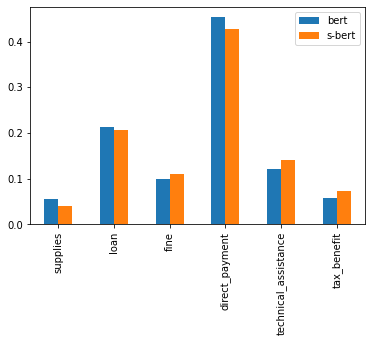

In [85]:
# Incentive type distribution accross all countries, for both models, in percentages
(incentives_counts_df / incentives_counts_df.sum()).plot.bar()

In [23]:
# Countries we're analyzing
df.country.unique()

array(['El Salvador', 'Chile', 'Mexico', 'India', 'USA'], dtype=object)